In [2]:
from datetime import datetime

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr
import statsmodels.api as sm


%matplotlib inline

In [12]:
df = pd.read_parquet("DataEnhanced_LV.parquet")
print(df.shape)
df.head()

(28864, 48)


,para_id,source,cabinet_ents,date,year,month,day,cabinet,cabinet_no,president,...,president_Ārlietu,president_Izglītības un zinātnes,president_Aizsardzības,president_Finanšu,president_Vides aizsardzības un reģionālās attīstības,president_Reģionālās attīstības un pašvaldību lietu,president_Kultūras,president_Prezidents,president_Ekonomikas,president_Labklājības
0,61d01db0c36b93aa8c582d24,https://www.delfi.lv/news/national/politics/va...,[Aizsardzības],1999-11-25 02:33:00,1999,11,25,Andris Šķēle,27,Vaira Viķe Freiberga,...,0,0,0,0,0,0,0,0,0,0
1,61cf823fc36b93aa8c57704e,https://www.delfi.lv/news/national/politics/be...,[Iekšlietu],1999-11-25 13:09:00,1999,11,25,Andris Šķēle,27,Vaira Viķe Freiberga,...,0,0,0,0,0,0,0,0,0,0
2,61cffbcfc36b93aa8c580460,https://www.delfi.lv/news/national/politics/st...,[Premjers],1999-11-25 17:16:00,1999,11,25,Andris Šķēle,27,Vaira Viķe Freiberga,...,0,0,0,0,0,0,0,0,0,0
3,61cfad4fc36b93aa8c57a4eb,https://www.delfi.lv/news/national/politics/ce...,[Premjers],1999-11-25 18:51:00,1999,11,25,Andris Šķēle,27,Vaira Viķe Freiberga,...,0,0,0,0,0,0,0,0,0,0
4,61cfd538c36b93aa8c57d5aa,https://www.delfi.lv/news/national/politics/sk...,[Premjers],1999-11-25 18:55:00,1999,11,25,Andris Šķēle,27,Vaira Viķe Freiberga,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.columns

Index(['para_id', 'source', 'cabinet_ents', 'date', 'year', 'month', 'day',
       'cabinet', 'cabinet_no', 'president',
       'Bērnu, ģimenes un sabiedrības integrācijas lietu', 'Veselības',
       'Premjers', 'Zemkopības', 'Bērnu un ģimenes lietu', 'Satiksmes',
       'Iekšlietu', 'Tieslietu', 'Vides', 'Ārlietu', 'Izglītības un zinātnes',
       'Aizsardzības', 'Finanšu',
       'Vides aizsardzības un reģionālās attīstības',
       'Reģionālās attīstības un pašvaldību lietu', 'Kultūras', 'Prezidents',
       'Ekonomikas', 'Labklājības',
       'president_Bērnu, ģimenes un sabiedrības integrācijas lietu',
       'president_Veselības', 'president_Premjers', 'president_Zemkopības',
       'president_Bērnu un ģimenes lietu', 'president_Satiksmes',
       'president_Iekšlietu', 'president_Tieslietu', 'president_Vides',
       'president_Ārlietu', 'president_Izglītības un zinātnes',
       'president_Aizsardzības', 'president_Finanšu',
       'president_Vides aizsardzības un reģionālās at

# Question 1 : How is presidential attention distributed accross policy spheres?  

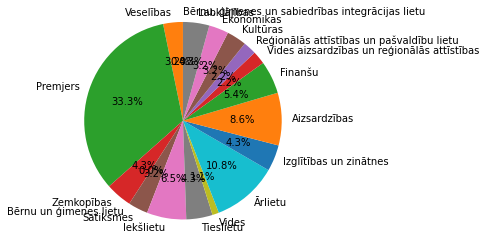

In [14]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
columns = ['president_Bērnu, ģimenes un sabiedrības integrācijas lietu',
       'president_Veselības', 'president_Premjers', 'president_Zemkopības',
       'president_Bērnu un ģimenes lietu', 'president_Satiksmes',
       'president_Iekšlietu', 'president_Tieslietu', 'president_Vides',
       'president_Ārlietu', 'president_Izglītības un zinātnes',
       'president_Aizsardzības', 'president_Finanšu',
       'president_Vides aizsardzības un reģionālās attīstības',
       'president_Reģionālās attīstības un pašvaldību lietu',
       'president_Kultūras', 'president_Ekonomikas',
       'president_Labklājības',]

labels =[i.replace("president_", "") for i in columns]

sizes = [round(df[i].mean()*1000) for i in columns]

data_dict = {labels[index]:i for index, i in enumerate(sizes)}

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [15]:
sorted(data_dict.items(), key = lambda x: x[1], reverse=True)

[('Premjers', 31),
 ('Ārlietu', 10),
 ('Aizsardzības', 8),
 ('Iekšlietu', 6),
 ('Finanšu', 5),
 ('Zemkopības', 4),
 ('Tieslietu', 4),
 ('Izglītības un zinātnes', 4),
 ('Labklājības', 4),
 ('Veselības', 3),
 ('Satiksmes', 3),
 ('Kultūras', 3),
 ('Ekonomikas', 3),
 ('Vides aizsardzības un reģionālās attīstības', 2),
 ('Reģionālās attīstības un pašvaldību lietu', 2),
 ('Vides', 1),
 ('Bērnu, ģimenes un sabiedrības integrācijas lietu', 0),
 ('Bērnu un ģimenes lietu', 0)]

# Q2: How the attention pattern differs over time?

In [16]:
columns = ['president_Premjers', 
           'president_Ārlietu',
           'president_Aizsardzības',
           'president_Iekšlietu',
           'president_Finanšu',]


agg_dict = {i : "mean" for i in columns}

df2 = df.groupby(["year"]).agg(agg_dict)
print(df2.shape)
df2.head()

(24, 5)


,president_Premjers,president_Ārlietu,president_Aizsardzības,president_Iekšlietu,president_Finanšu
year,,,,,
1999,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0
2001,0.0,0.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0,0.0


In [17]:
df2.tail()

,president_Premjers,president_Ārlietu,president_Aizsardzības,president_Iekšlietu,president_Finanšu
year,,,,,
2018,0.039749,0.018828,0.012552,0.003138,0.000000
2019,0.010436,0.018975,0.005693,0.002846,0.000949
2020,0.000000,0.000000,0.000000,0.000000,0.000000
2021,0.000000,0.000000,0.000000,0.000000,0.000000
2022,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:xlabel='year'>

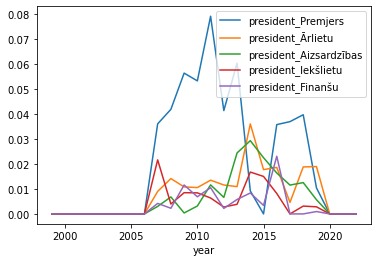

In [18]:
df2.plot.line()

# Does presidential attention mirror media attention?

In [19]:
ministries = ['Premjers' , 'Ārlietu', 'Aizsardzības', 'Iekšlietu', 
              'Finanšu', 'Zemkopības', 'Tieslietu', 'Izglītības un zinātnes', 
              'Labklājības', 'Veselības', 'Satiksmes', 'Kultūras', 'Ekonomikas', 
              'Vides aizsardzības un reģionālās attīstības', 'Reģionālās attīstības un pašvaldību lietu',
              'Vides', 'Bērnu, ģimenes un sabiedrības integrācijas lietu', 'Bērnu un ģimenes lietu', ]


ministries2 = ["president_"+i for i in ministries]

ministries_full = ministries + ministries2

agg_dict = {i:"mean" for i in ministries_full}
agg_dict["president"] = "last" 

dfg = df.groupby(["year", "month"]).agg(agg_dict)
dfg["grybauskaite"] = dfg.apply(lambda x:int(x["president"]=="Dalia Grybauskaite"), axis=1)
print(dfg.shape)
dfg.head()

(269, 38)


Premjers   Ārlietu  Aizsardzības  Iekšlietu   Finanšu  Zemkopības  \
year month                                                                      
1999 11     0.733333  0.000000      0.066667   0.066667  0.000000    0.000000   
     12     0.361111  0.250000      0.055556   0.166667  0.027778    0.027778   
2000 1      0.600000  0.100000      0.000000   0.100000  0.000000    0.000000   
     2      0.750000  0.035714      0.035714   0.000000  0.035714    0.000000   
     3      0.500000  0.166667      0.047619   0.095238  0.023810    0.000000   

            Tieslietu  Izglītības un zinātnes  Labklājības  Veselības  ...  \
year month                                                             ...   
1999 11           0.0                0.400000     0.000000        0.0  ...   
     12           0.0                0.277778     0.000000        0.0  ...   
2000 1            0.0                0.200000     0.050000        0.0  ...   
     2            0.0                0.071429     0.107143        0.0  ...   
     3            0.0                0.238095     0.000000        0.0  ...   

            president_Satiksmes  president_Kultūras  president_Ekonomikas  \
year month                                                                  
1999 11                     0.0                 0.0                   0.0   
     12                     0.0                 0.0                   0.0   
2000 1                      0.0                 0.0                   0.0   
     2                      0.0                 0.0                   0.0   
     3                      0.0                 0.0                   0.0   

            president_Vides aizsardzības un reģionālās attīstības  \
year month                                                          
1999 11                                                   0.0       
     12                                                   0.0       
2000 1                                                    0.0       
     2                                                    0.0       
     3                                                    0.0       

            president_Reģionālās attīstības un pašvaldību lietu  \
year month                                                        
1999 11                                                   0.0     
     12                                                   0.0     
2000 1                                                    0.0     
     2                                                    0.0     
     3                                                    0.0     

            president_Vides  \
year month                    
1999 11                 0.0   
     12                 0.0   
2000 1                  0.0   
     2                  0.0   
     3                  0.0   

            president_Bērnu, ģimenes un sabiedrības integrācijas lietu  \
year month                                                               
1999 11                                                   0.0            
     12                                                   0.0            
2000 1                                                    0.0            
     2                                                    0.0            
     3                                                    0.0            

            president_Bērnu un ģimenes lietu             president  \
year month                                                           
1999 11                                    0  Vaira Viķe Freiberga   
     12                                    0  Vaira Viķe Freiberga   
2000 1                                     0  Vaira Viķe Freiberga   
     2                                     0  Vaira Viķe Freiberga   
     3                                     0  Vaira Viķe Freiberga   

            grybauskaite  
year month                
1999 11                0  
     12                0  
2000 1                 0  
     2                 0  
     3       

In [20]:
for m in ministries:
    print(m)
    print(pearsonr(dfg[m], dfg["president_"+m]))
    print()

Premjers
(0.09620211684287103, 0.11545566751360399)

Ārlietu
(0.39016962929661075, 3.2614662607344576e-11)

Aizsardzības
(0.44444792852088855, 1.884025027606993e-14)

Iekšlietu
(0.3287528412720247, 3.369630890849667e-08)

Finanšu
(0.3285243205526353, 3.448490118915178e-08)

Zemkopības
(0.5483881790398626, 1.6056103191951939e-22)

Tieslietu
(0.22198040031950486, 0.00024285152824671914)

Izglītības un zinātnes
(0.08283079539171213, 0.17556786439771987)

Labklājības
(0.34590076831217353, 5.621195205333222e-09)

Veselības
(0.14664173952983234, 0.016087299633658323)

Satiksmes
(0.19291089708427686, 0.0014770527453926215)

Kultūras
(0.49170399234287593, 8.807705453853898e-18)

Ekonomikas
(0.34506512037319237, 6.149437881942686e-09)

Vides aizsardzības un reģionālās attīstības
(0.3591850381063476, 1.3006671759491291e-09)

Reģionālās attīstības un pašvaldību lietu
(0.5607103275780431, 1.1268648588954723e-23)

Vides
(0.5051017022120141, 8.002526127297527e-19)

Bērnu, ģimenes un sabiedrības inte

/home/lukas/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
